In [4]:
# These codes are from CMC website under python to use API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # the limit of data we import
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [5]:
type(data)

dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data']) # make the data in json to pd dataframe format
df['timestamp'] = pd.to_datetime('now') # to add timestamp on when does it loaded
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980943e+07,1.980943e+07,False,NaN,1,None,None,None,2025-01-13T03:54:00.000Z,94116.131876,2.606366e+10,43.5966,0.129483,-0.444434,-4.913718,-7.840325,4.482027,43.871750,1.864387e+12,56.9339,1.976439e+12,None,2025-01-13T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204930e+08,1.204930e+08,True,NaN,2,None,None,None,2025-01-13T03:55:00.000Z,3244.344418,1.454700e+10,29.2449,-0.094527,-1.122739,-11.482433,-17.052900,1.017876,24.146558,3.909209e+11,11.9378,3.909209e+11,None,2025-01-13T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.749312e+10,9.998667e+10,False,NaN,3,None,None,None,2025-01-13T03:55:00.000Z,2.517576,5.635092e+09,-34.6066,0.608551,-0.533802,4.369178,1.871043,262.023391,359.050221,1.447433e+11,4.4205,2.517576e+11,None,2025-01-13T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
3,825,Tether USDt,USDT,tether,112278,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374497e+11,1.414371e+11,True,NaN,4,None,None,None,2025-01-13T03:55:00.000Z,0.999480,6.400298e+10,13.3977,-0.013216,-0.005274,-0.022060,-0.058651,-0.129158,-0.005614,1.373783e+11,4.1956,1.413636e+11,None,2025-01-13T03:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 03:59:59.302416
4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440062e+08,1.440062e+08,False,NaN,5,None,None,None,2025-01-13T03:55:00.000Z,685.772287,1.339593e+09,3.8453,-0.112936,-1.371383,-3.736904,-6.064047,9.736800,17.120602,9.875545e+10,3.0160,9.875545e+10,None,2025-01-13T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.844318e+08,5.921448e+08,True,NaN,6,None,None,None,2025-01-13T03:55:00.000Z,185.003794,1.859770e+09,-10.0758,0.041854,-1.204837,-14.203520,-18.144118,-15.204808,18.893533,8.962173e+10,2.7368,1.095490e+11,None,2025-01-13T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.476010e+11,1.476010e+11,True,NaN,7,None,None,None,2025-01-13T03:55:00.000Z,0.332466,1.690361e+09,11.9914,0.129645,-2.230083,-13.870711,-18.841936,-14.374852,185.329427,4.907224e+10,1.4987,4.907224e+10,None,2025-01-13T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 03:59:59.302416
7,3408,USDC,USDC,usd-coin,24656,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.572611e+10,4.572611e+10,False,NaN,8,None,None,None,2025-01-13T03:55:00.000Z,0.999911,4.041270e+09,9.4125,-0.004777,-0.007573,-0.011334,0.002850,-0.002183,0.010214,4.572205e+10,1.3964,4.572205e+10,None,2025-01-13T03:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-13 03:59:59.302416
8,2010,Cardano,ADA,cardano,1433,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smar

In [13]:
# to automate and append the data into the df created above.

def api_runner():
    global df # use the df from Global Variable (the df created before), need to stated that df is global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
#     # Use this if you just want to keep it in a dataframe
#     df2 = pd.json_normalize(data['data'])
#     df2['Timestamp'] = pd.to_datetime('now')
#     df = df.append(df2) # append the new data into the existing df


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/leon/Documents/Personal/Online Class/Data Analyst Bootcamp (Alex the Analyst)/Python/Output/API.csv'):
        df.to_csv(r'/Users/leon/Documents/Personal/Online Class/Data Analyst Bootcamp (Alex the Analyst)/Python/Output/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/leon/Documents/Personal/Online Class/Data Analyst Bootcamp (Alex the Analyst)/Python/Output/API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [15]:
import os 
from time import time
from time import sleep

for i in range(333): # 333 run per day
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [16]:
df72 = pd.read_csv(r'/Users/leon/Documents/Personal/Online Class/Data Analyst Bootcamp (Alex the Analyst)/Python/Output/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.980946e+07,1.980946e+07,False,NaN,1,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,94762.997809,2.677249e+10,48.9514,0.519316,0.195173,-4.503691,-6.935143,5.624322,44.585648,1.877203e+12,56.8975,1.990023e+12,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
1,1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204930e+08,1.204930e+08,True,NaN,2,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,3254.688045,1.491001e+10,32.8543,0.016245,-0.922807,-11.189286,-16.803446,1.143501,24.577334,3.921673e+11,11.9062,3.921673e+11,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
2,2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.749312e+10,9.998667e+10,False,NaN,3,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,2.532511,5.699871e+09,-34.3480,0.765601,-0.568098,4.830702,2.935055,263.536489,361.694838,1.456020e+11,4.4170,2.532511e+11,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
3,3,825,Tether USDt,USDT,tether,112278,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.374497e+11,1.414371e+11,True,NaN,4,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.999469,6.536795e+10,16.3335,-0.012029,-0.000233,-0.026581,-0.048790,-0.112270,0.008580,1.373768e+11,4.1674,1.413620e+11,NaN,2025-01-13T04:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 04:30:36.761931
4,4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440062e+08,1.440062e+08,False,NaN,5,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,688.920741,1.357341e+09,4.8267,0.245432,-1.001218,-3.213622,-5.495110,9.636419,17.550979,9.920884e+10,3.0096,9.920884e+10,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
5,5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.844317e+08,5.921446e+08,True,NaN,6,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,186.591579,1.900226e+09,-7.5670,0.628876,-0.315459,-13.627265,-17.227822,-14.489381,19.590520,9.039087e+10,2.7443,1.104892e+11,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
6,6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.476013e+11,1.476013e+11,True,NaN,7,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.334905,1.710075e+09,12.4359,0.382292,-2.104696,-13.381696,-18.079584,-13.667845,186.653819,4.943240e+10,1.4996,4.943240e+10,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
7,7,3408,USDC,USDC,usd-coin,24656,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.572773e+10,4.572773e+10,False,NaN,8,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.999984,4.139118e+09,12.6132,-0.000492,0.002643,-0.001504,0.008874,0.013987,0.017227,4.572698e+10,1.3872,4.572698e+10,NaN,2025-01-13T04:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-13 04:30:36.761931
8,8,2010,Cardano,ADA,cardano,1433,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smar

In [17]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19809456.00000,19809456.00000,False,NaN,1,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,94762.99781,26772491165.44756,48.95140,0.51932,0.19517,-4.50369,-6.93514,5.62432,44.58565,1877203435526.47363,56.89750,1990022953990.05005,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
1,1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120493047.54220,120493047.54220,True,NaN,2,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,3254.68805,14910011292.74921,32.85430,0.01624,-0.92281,-11.18929,-16.80345,1.14350,24.57733,392167281378.19904,11.90620,392167281378.20001,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
2,2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57493120449.00000,99986673391.00000,False,NaN,3,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,2.53251,5699870840.63583,-34.34800,0.76560,-0.56810,4.83070,2.93505,263.53649,361.69484,145601987084.60858,4.41700,253251147176.41000,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
3,3,825,Tether USDt,USDT,tether,112278,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,137449718934.41779,141437091577.45093,True,NaN,4,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.99947,65367954092.16595,16.33350,-0.01203,-0.00023,-0.02658,-0.04879,-0.11227,0.00858,137376777794.75851,4.16740,141362034438.51999,NaN,2025-01-13T04:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-13 04:30:36.761931
4,4,1839,BNB,BNB,bnb,2331,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144006178.85000,144006178.85000,False,NaN,5,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,688.92074,1357341095.88624,4.82670,0.24543,-1.00122,-3.21362,-5.49511,9.63642,17.55098,99208843396.46445,3.00960,99208843396.46001,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
5,5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,484431664.14196,592144580.79837,True,NaN,6,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,186.59158,1900226131.81947,-7.56700,0.62888,-0.31546,-13.62726,-17.22782,-14.48938,19.59052,90390869002.68423,2.74430,110489192172.03000,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
6,6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147601286383.70523,147601286383.70523,True,NaN,7,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.33490,1710075090.49397,12.43590,0.38229,-2.10470,-13.38170,-18.07958,-13.66784,186.65382,49432402182.33706,1.49960,49432402182.34000,NaN,2025-01-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-13 04:30:36.761931
7,7,3408,USDC,USDC,usd-coin,24656,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45727725104.50444,45727725104.50444,False,NaN,8,NaN,NaN,NaN,2025-01-13T04:30:00.000Z,0.99998,4139117993.68118,12.61320,-0.00049,0.00264,-0.00150,0.00887,0.01399,0.01723,45726980726.72025,1.38720,45726980726.72000,NaN,2025-01-13T04:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86

In [23]:
# Now let's look at the coin trends over time

df3 = df72.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.51932,0.19517,-4.50369,-6.93514,5.62432,44.58565
Ethereum,-0.00622,-0.94382,-11.18129,-16.81994,1.16027,24.56222
XRP,0.74554,-0.56117,4.83655,2.93802,263.58525,361.72245
Tether USDt,-0.00928,-0.00399,-0.02571,-0.04926,-0.11735,0.01046
BNB,0.23038,-0.99942,-3.20919,-5.49629,9.64114,17.55738
Solana,0.60317,-0.32951,-13.63485,-17.24594,-14.48257,19.56858
Dogecoin,0.38495,-2.10036,-13.36321,-18.06894,-13.61990,186.70711
USDC,0.00499,0.00142,0.00294,0.01059,0.01394,0.02118
Cardano,0.43800,-6.27080,-12.07657,-13.69067,67.88437,164.82787


In [24]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.51932
             quote.USD.percent_change_24h     0.19517
             quote.USD.percent_change_7d     -4.50369
             quote.USD.percent_change_30d    -6.93514
             quote.USD.percent_change_60d     5.62432
             quote.USD.percent_change_90d    44.58565
Ethereum     quote.USD.percent_change_1h     -0.00622
             quote.USD.percent_change_24h    -0.94382
             quote.USD.percent_change_7d    -11.18129
             quote.USD.percent_change_30d   -16.81994
             quote.USD.percent_change_60d     1.16027
             quote.USD.percent_change_90d    24.56222
XRP          quote.USD.percent_change_1h      0.74554
             quote.USD.percent_change_24h    -0.56117
             quote.USD.percent_change_7d      4.83655
             quote.USD.percent_change_30d     2.93802
             quote.USD.percent_change_60d   263.58525
             quote.USD.percent_change_90

In [25]:
type(df4)

pandas.core.series.Series

In [34]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.51932
            quote.USD.percent_change_24h   0.19517
            quote.USD.percent_change_7d   -4.50369
            quote.USD.percent_change_30d  -6.93514
            quote.USD.percent_change_60d   5.62432
            quote.USD.percent_change_90d  44.58565
Ethereum    quote.USD.percent_change_1h   -0.00622
            quote.USD.percent_change_24h  -0.94382
            quote.USD.percent_change_7d  -11.18129
            quote.USD.percent_change_30d -16.81994
            quote.USD.percent_change_60d   1.16027
            quote.USD.percent_change_90d  24.56222
XRP         quote.USD.percent_change_1h    0.74554
            quote.USD.percent_change_24h  -0.56117
            quote.USD.percent_change_7d    4.83655
            quote.USD.percent_change_30d   2.93802
            quote.USD.percent_change_60d 263.58525
            quote.USD.percent_change_90d 361.72245
Tether USDt quote.USD.percent_change_1h   -0.00928
            quote.USD.percent_change_24h  -0.00399
            quote.USD.percent_change_7d   -0.02571
            quote.USD.percent_change_30d  -0.04926
            quote.USD.percent_change_60d  -0.11735
            quote.USD.percent_change_90d   0.01046
BNB         quote.USD.percent_change_1h    0.23038
            quote.USD.percent_change_24h  -0.99942
            quote.USD.percent_change_7d   -3.20919
            quote.USD.percent_change_30d  -5.49629
            quote.USD.percent_change_60d   9.64114
            quote.USD.percent_change_90d  17.55738
Solana      quote.USD.percent_change_1h    0.60317
            quote.USD.percent_change_24h  -0.32951
            quote.USD.percent_change_7d  -13.63485
            quote.USD.percent_change_30d -17.24594
            quote.USD.percent_change_60d -14.48257
            quote.USD.percent_change_90d  19.56858
Dogecoin    quote.USD.percent_change_1h    0.38495
            quote.USD.percent_change_24h  -2.10036
            quote.USD.percent_change_7d  -13.36321
            quote.USD.percent_change_30d -18.06894
            quote.USD.percent_change_60d -13.61990
            quote.USD.percent_change_90d 186.70711
USDC        quote.USD.percent_change_1h    0.00499
            quote.USD.percent_change_24h   0.00142
            quote.USD.percent_change_7d    0.00294
            quote.USD.percent_change_30d   0.01059
            quote.USD.percent_change_60d   0.01394
            quote.USD.percent_change_90d   0.02118
Cardano     quote.USD.percent_change_1h    0.43800
            quote.USD.percent_change_24h  -6.27080
            quote.USD.percent_change_7d  -12.07657
            quote.USD.percent_change_30d -13.69067
            quote.USD.percent_change_60d  67.88437
            quote.USD.percent_change_90d 164.82787
TRON        quote.USD.percent_change_1h    0.28865
            quote.USD.percent_change_24h  -4.20588
            quote.USD.percent_change_7d  -12.70131
            quote.USD.percent_change_30d -21.33010
            quote.USD.percent_change_60d  29.09649
            quote.USD.percent_change_90d  44.64477
Avalanche   quote.USD.percent_change_1h    0.50572
            quote.USD.percent_change_24h  -3.50316
            quote.USD.percent_change_7d  -18.03822
            quote.USD.percent_change_30d -31.63734
            quote.USD.percent_change_60d   8.20348
            quote.USD.percent_change_90d  24.23887
Sui         quote.USD.percent_change_1h   -0.67682
            quote.USD.percent_change_24h  -5.16829
            quote.USD.percent_change_7d  -11.15153
            quote.USD.percent_change_30d  -2.60646
            quote.USD.percent_change_60d  38.65401
            quote.USD.percent_change_90d 108.89869
Toncoin     quote.USD.percent_change_1h    0.86727
            quote.USD.percent_change_24h  -3.41121
            quote.USD.percent_change_7d   -9.07248
            quote.USD.percent_change_30d -17.31929
            quote.USD.percent_change_60d  -3.33209
            quo

In [27]:
df5.count()

values    90
dtype: int64

In [36]:
# to reset index, we don't want name
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.51932
1,Bitcoin,quote.USD.percent_change_24h,0.19517
2,Bitcoin,quote.USD.percent_change_7d,-4.50369
3,Bitcoin,quote.USD.percent_change_30d,-6.93514
4,Bitcoin,quote.USD.percent_change_60d,5.62432
5,Bitcoin,quote.USD.percent_change_90d,44.58565
6,Ethereum,quote.USD.percent_change_1h,-0.00622
7,Ethereum,quote.USD.percent_change_24h,-0.94382
8,Ethereum,quote.USD.percent_change_7d,-11.18129
9,Ethereum,quote.USD.percent_change_30d,-16.81994


In [37]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.51932
1,Bitcoin,quote.USD.percent_change_24h,0.19517
2,Bitcoin,quote.USD.percent_change_7d,-4.50369
3,Bitcoin,quote.USD.percent_change_30d,-6.93514
4,Bitcoin,quote.USD.percent_change_60d,5.62432
5,Bitcoin,quote.USD.percent_change_90d,44.58565
6,Ethereum,quote.USD.percent_change_1h,-0.00622
7,Ethereum,quote.USD.percent_change_24h,-0.94382
8,Ethereum,quote.USD.percent_change_7d,-11.18129
9,Ethereum,quote.USD.percent_change_30d,-16.81994


In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.51932
1,Bitcoin,24h,0.19517
2,Bitcoin,7d,-4.50369
3,Bitcoin,30d,-6.93514
4,Bitcoin,60d,5.62432
5,Bitcoin,90d,44.58565
6,Ethereum,1h,-0.00622
7,Ethereum,24h,-0.94382
8,Ethereum,7d,-11.18129
9,Ethereum,30d,-16.81994


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

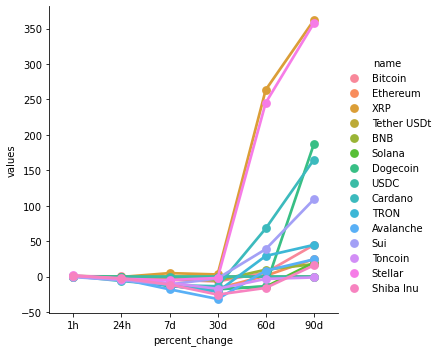

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,94762.99781,2025-01-13 04:31:54.927445


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

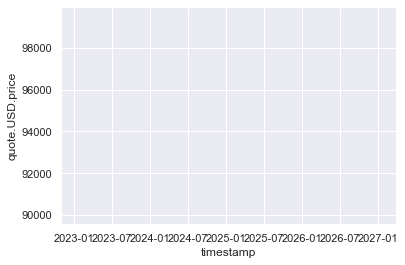

In [44]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)